In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('loan_approval_dataset.csv')

In [3]:
df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.columns = df.columns.str.strip()

print("Column names after strip:", df.columns)

Column names after strip: Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder1 = LabelEncoder()

df['education_encoded'] = label_encoder1.fit_transform(df['education'])



In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder1 = LabelEncoder()

df['self_employed_encoded'] = label_encoder1.fit_transform(df['self_employed'])



In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder1 = LabelEncoder()

df['loan_status_encoded'] = label_encoder1.fit_transform(df['loan_status'])



In [8]:
df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_encoded,self_employed_encoded,loan_status_encoded
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,0,0,0
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,1,1,1
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0,0,1
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0,0,1
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,1,1,1


In [9]:
df.drop('loan_status',axis=1,inplace=True)
df.drop('education',axis=1,inplace=True)
df.drop('self_employed',axis=1,inplace=True)

In [10]:
df.head(5)

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_encoded,self_employed_encoded,loan_status_encoded
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   income_annum              4269 non-null   int64
 3   loan_amount               4269 non-null   int64
 4   loan_term                 4269 non-null   int64
 5   cibil_score               4269 non-null   int64
 6   residential_assets_value  4269 non-null   int64
 7   commercial_assets_value   4269 non-null   int64
 8   luxury_assets_value       4269 non-null   int64
 9   bank_asset_value          4269 non-null   int64
 10  education_encoded         4269 non-null   int32
 11  self_employed_encoded     4269 non-null   int32
 12  loan_status_encoded       4269 non-null   int32
dtypes: int32(3), int64(10)
memory usage: 383.7 KB


In [12]:
df.shape

(4269, 13)

In [13]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_encoded,self_employed_encoded,loan_status_encoded
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4269.000000
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.497775,0.503631,0.377840
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.500054,0.500045,0.484904
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000,0.000000,0.000000
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000,0.000000,0.000000
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,0.000000,1.000000,0.000000
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000,1.000000,1.000000
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000,1.000000,1.000000


<Axes: >

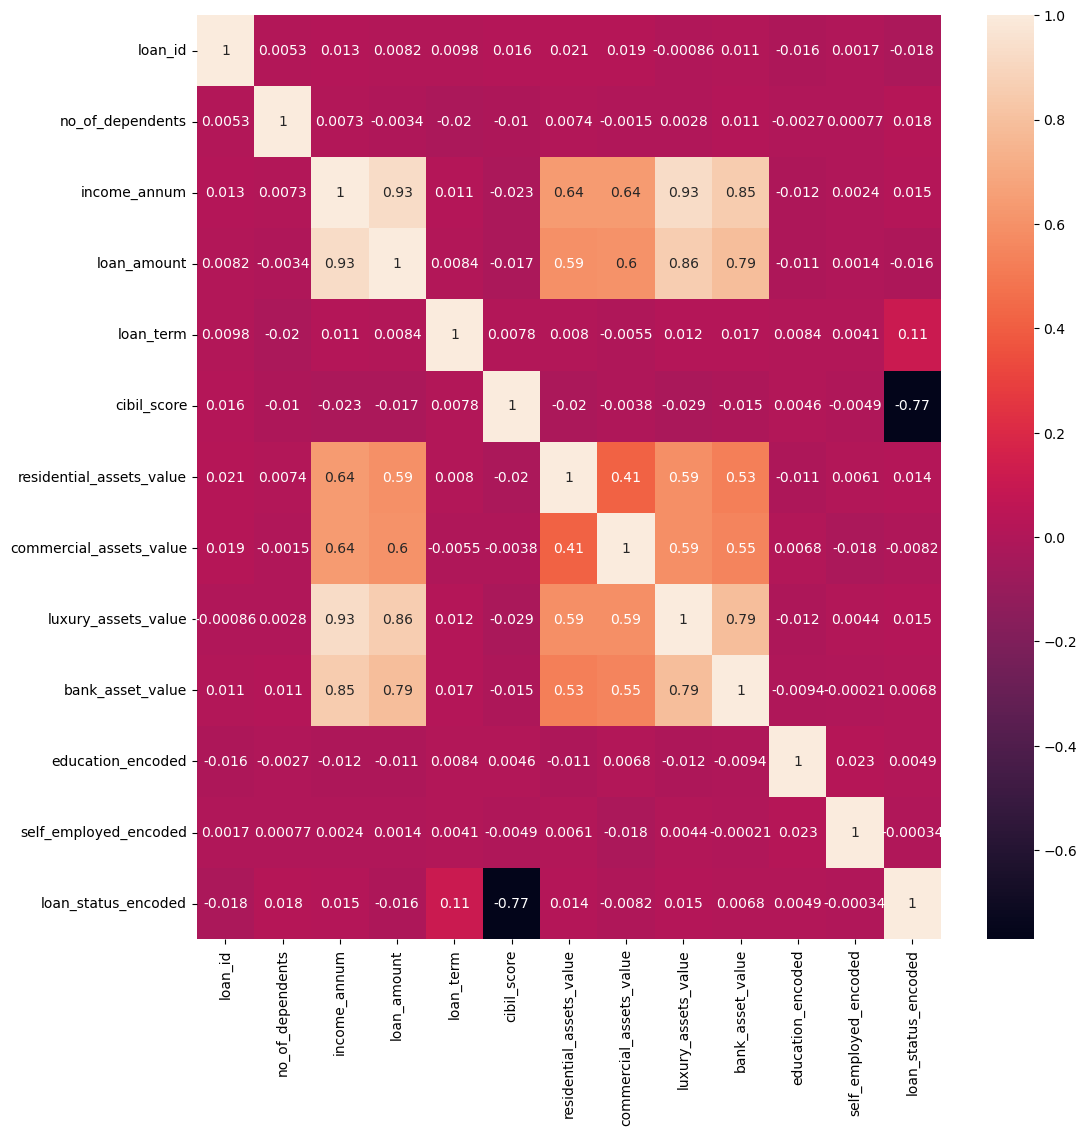

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [16]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
education_encoded           0
self_employed_encoded       0
loan_status_encoded         0
dtype: int64

In [17]:
X = df.drop(columns=['loan_id','loan_status_encoded'],axis=1,)
Y = df['loan_status_encoded']

In [18]:
print(X)

      no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                    2       9600000     29900000         12          778   
1                    0       4100000     12200000          8          417   
2                    3       9100000     29700000         20          506   
3                    3       8200000     30700000          8          467   
4                    5       9800000     24200000         20          382   
...                ...           ...          ...        ...          ...   
4264                 5       1000000      2300000         12          317   
4265                 0       3300000     11300000         20          559   
4266                 2       6500000     23900000         18          457   
4267                 1       4100000     12800000          8          780   
4268                 1       9200000     29700000         10          607   

      residential_assets_value  commercial_assets_value  luxury_assets_valu

In [19]:
print(Y)

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name: loan_status_encoded, Length: 4269, dtype: int32


In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=2,test_size=0.2,stratify=Y)

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, Y_train)


RandomForestClassifier()

In [24]:

train_predictions = rf_classifier.predict(X_train)

# Predict the labels for the test data
test_predictions = rf_classifier.predict(X_test)

# Compute the accuracy for the training data
train_accuracy = accuracy_score(Y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Compute the accuracy for the test data
test_accuracy = accuracy_score(Y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 1.0000
Test Accuracy: 0.9836
